<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DEFINICIJA-NALOGE" data-toc-modified-id="DEFINICIJA-NALOGE-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DEFINICIJA NALOGE</a></span></li><li><span><a href="#Simbolno-reševanje" data-toc-modified-id="Simbolno-reševanje-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simbolno reševanje</a></span><ul class="toc-item"><li><span><a href="#Izmerjeni-podatki" data-toc-modified-id="Izmerjeni-podatki-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Izmerjeni podatki</a></span></li></ul></li><li><span><a href="#Sistem-enačb" data-toc-modified-id="Sistem-enačb-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sistem enačb</a></span></li><li><span><a href="#Aproksimacija" data-toc-modified-id="Aproksimacija-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aproksimacija</a></span></li><li><span><a href="#Integriranje" data-toc-modified-id="Integriranje-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Integriranje</a></span></li><li><span><a href="#Iskanje-ničel" data-toc-modified-id="Iskanje-ničel-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Iskanje ničel</a></span></li><li><span><a href="#Reševanje-diferencialnih-enačb" data-toc-modified-id="Reševanje-diferencialnih-enačb-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reševanje diferencialnih enačb</a></span></li></ul></div>

Avtorica: **Ada Kotar Celarc**

Datum: 17.1.2021

*Potrjujem, da sem avtorica projektne naloge in da sem vso vsebino pripravila sama. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjevala pogojev za pristop k izpitu.*

In [1]:
#pip install jupyter_contrib_nbextensions

In [2]:
#%sx conda install -c conda-forge jupyter_contrib_nbextensions -y
#%sx jupyter contrib nbextension install --user
#%sx jupyter nbextension enable toc2/main

# DEFINICIJA NALOGE

Za gibanje, ki sem ga opisovala pri svojem projektu sem si izbrala **žongliranje**, pri katerem sem iz videa (priloženo spodaj) izmerila določene čase in poti in nato iz tega izpeljala vse potrebne vsebine.

Gibanje sem izmerila okrog 23. sekunde, kjer mladenič še žonglira relativno počasi, da bi se izognila večjim napakam pri merjenju časa.

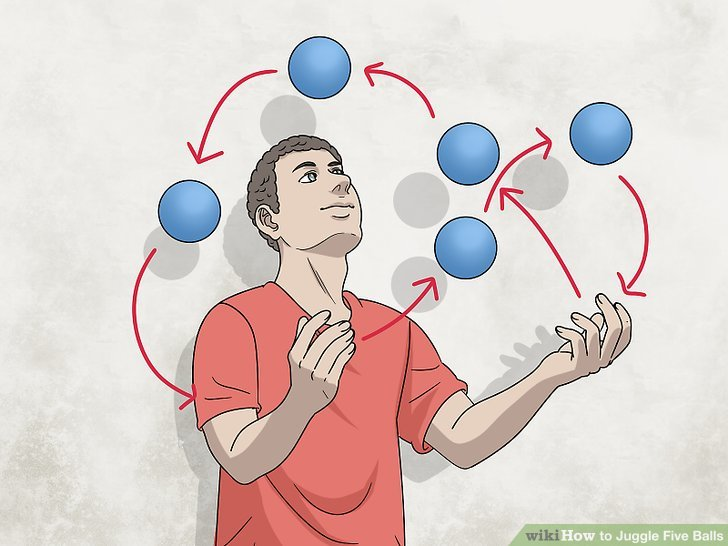

In [15]:
from IPython.display import Image
Image("juggle.jpg", width = 400, height = 300)

Osredotočila sem se na gibanje ene žogice pri žongliranju s tremi žogicami. Gibanje poteka v obliki osmice. Slika zgoraj že namiguje na to, da bi lahko gibanje žogice med žongliranjem aproksimirali s sinusno krivuljo, kar sem pri 4. točki tudi dokazala.

Številke pred naslovi v kazalu označujejo moj potek dela.

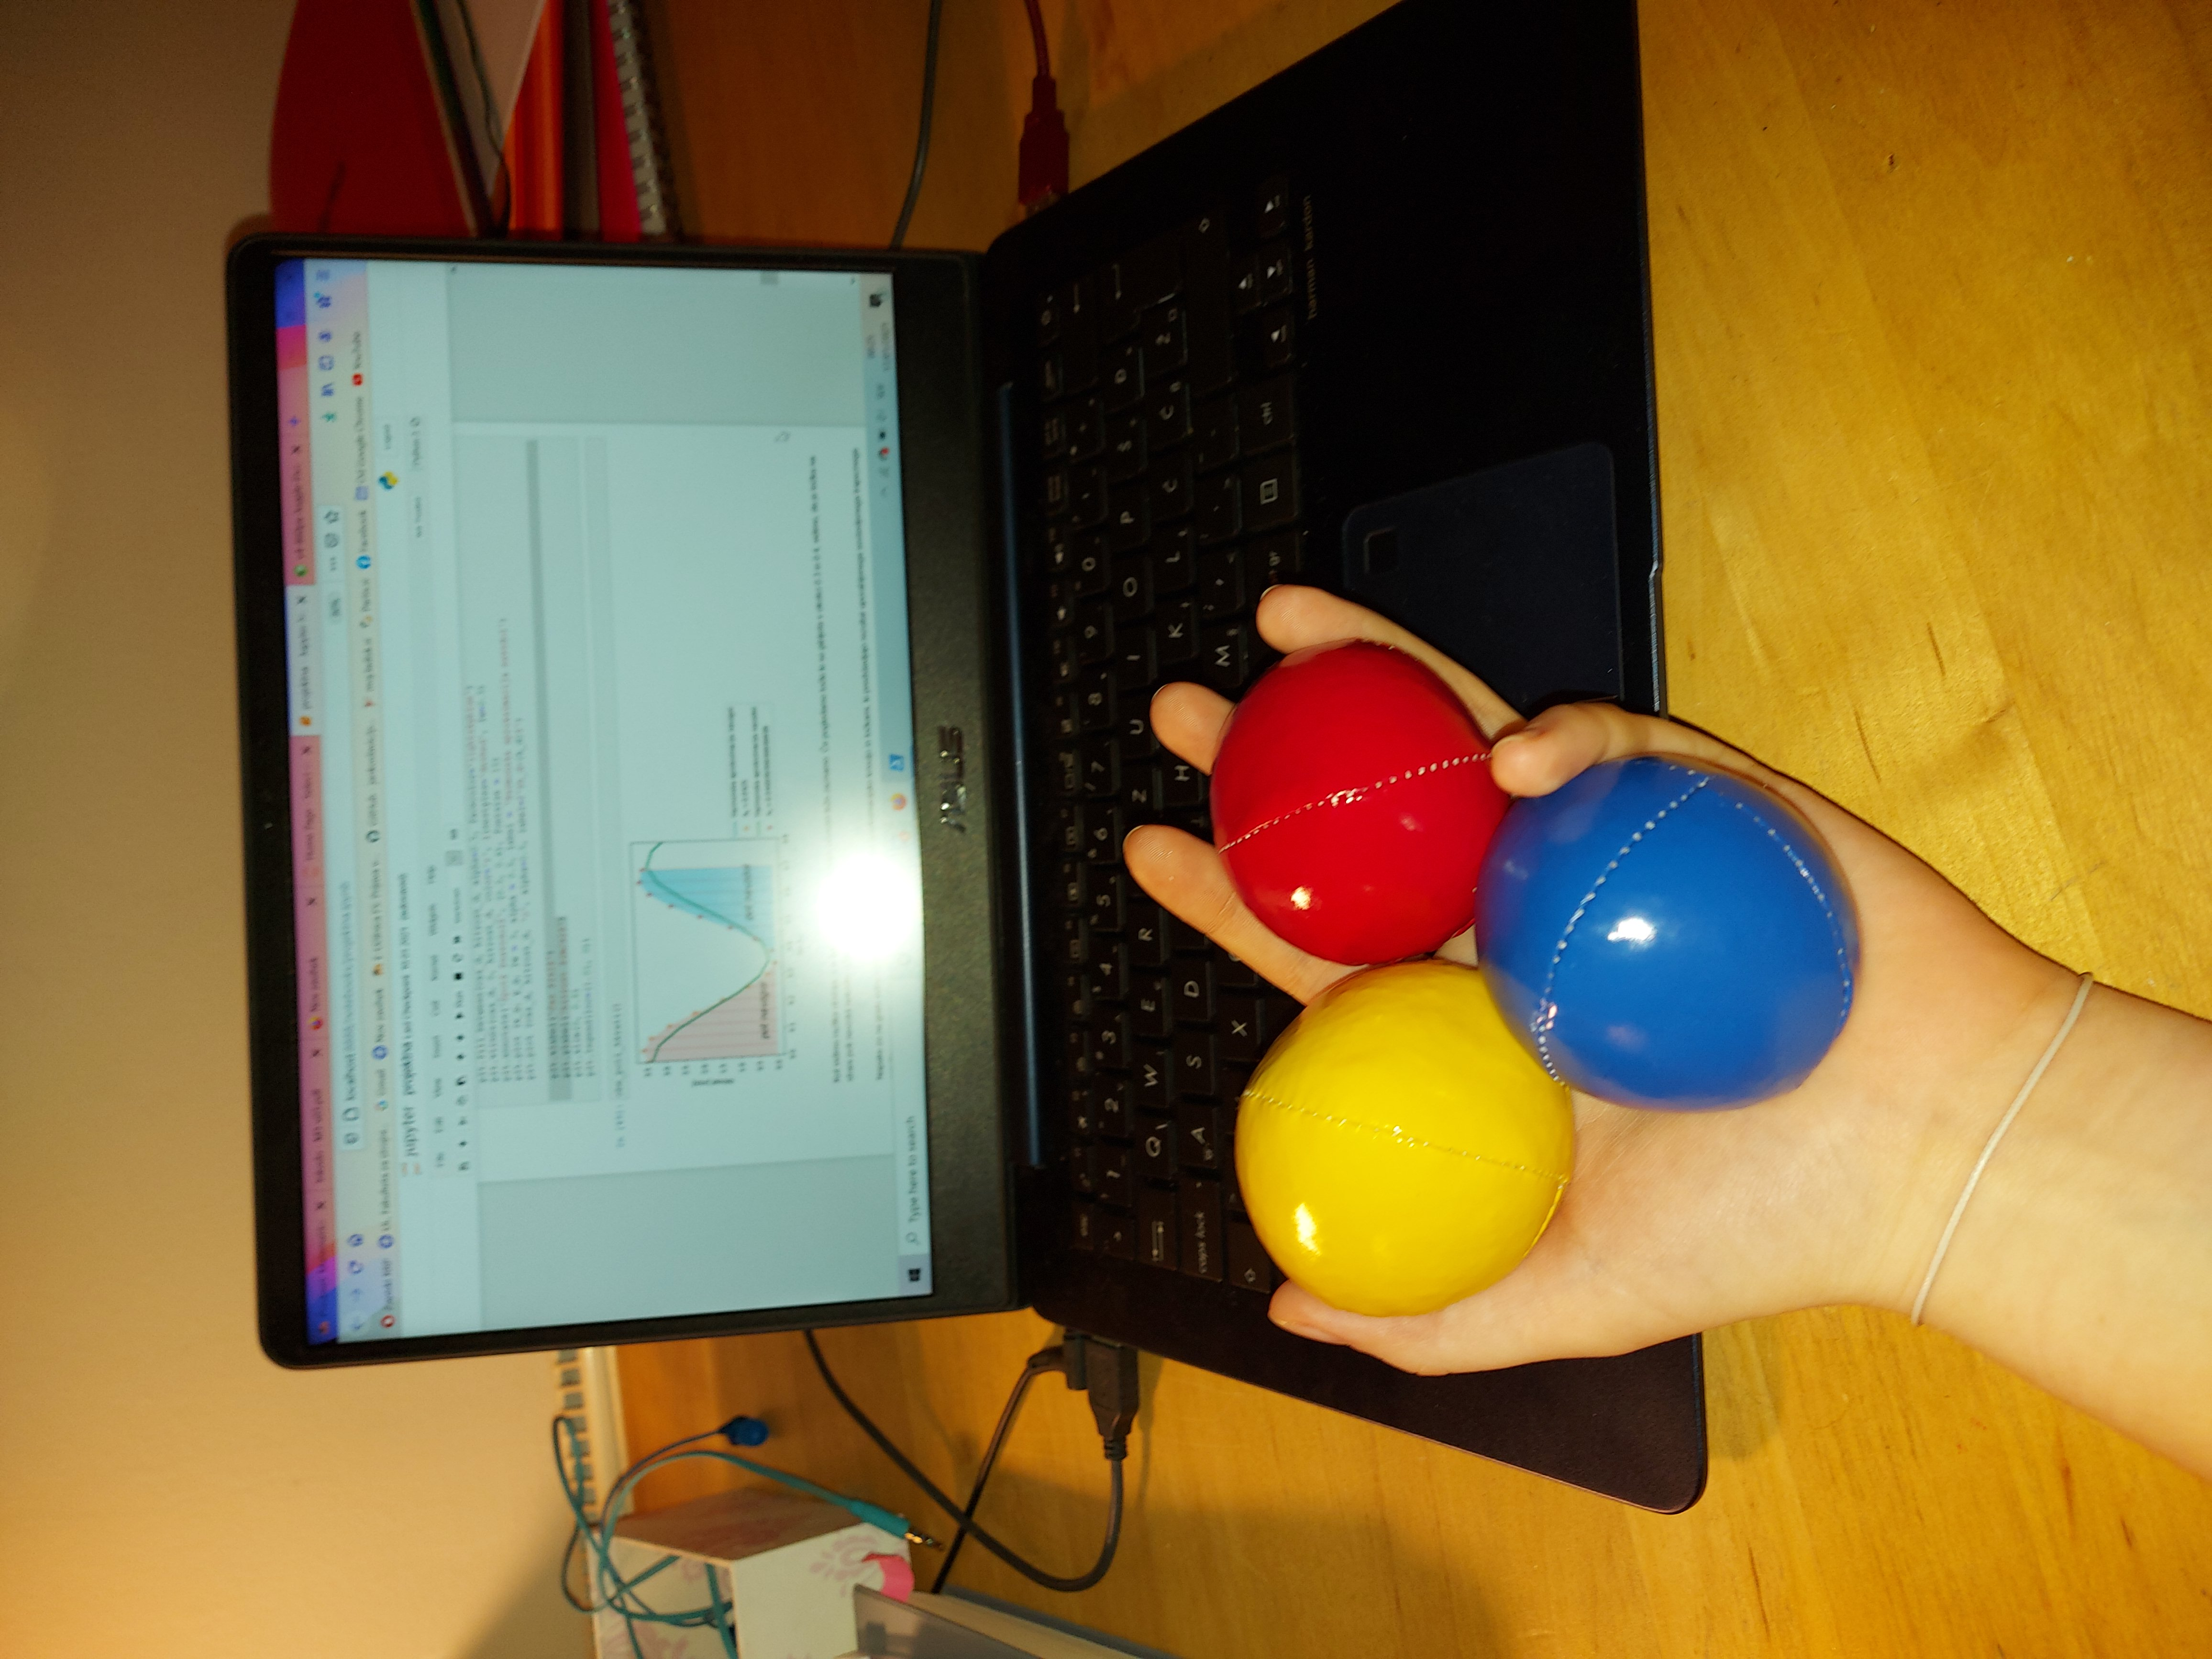

In [16]:
from IPython.display import Image
Image("moje_zogice.jpg", width = 300, height = 200)

Za ta problem sem se odločila, ker sem se med karanteno nameravala naučiti žonglirati, a se to (še) ni zgodilo. Za namen pisanja te projektne naloge so mi lastne žogice prišle prav, saj sem lahko opazovala njihovo gibanje in upoštevala njihovo realno težo pri 7. točki - reševanju diferencialnih enačb.

# Simbolno reševanje

In [17]:
import sympy as sym
sym.init_printing() # za lep prikaz izrazov

Simbolno bom reševala sistem treh enačb, treh neznank, iz katerega bom dobila neznanke: $s_r$,  $s_g$,  $v_0$, ki se nahajajo v matriki neznank. Te količine so pot, ki jo žogica preživi v roki, pot, ki jo žogica prepotuje pri potovanju navzgor ter začetna hitrost.

Najprej vse simbole zapišem:

In [18]:
t_c, t_g, t_d, t_r = sym.symbols('t_c, t_g, t_d, t_r')

In [19]:
s_c, s_g, s_d, s_r = sym.symbols('s_c, s_g, s_d, s_r')

In [20]:
g, v_0, s, v = sym.symbols('g, v_0, s, v')

Prikažem enačbe (le s simboli):

$$s_g = v_0*t_g - \frac{g*t_g^2}{2}$$
$$s_c = 2*(s_g + s_d + s_r)$$
$$t_g*g = v_0$$

Rešujemo sistem $AX = b$

Določim **matriko koeficientov A**:

In [21]:
A = sym.Matrix([[1, 0, -t_g], 
              [1, 1, 0],
              [0, 0, 1]],dtype=object)
A

⎡1  0  -t_g⎤
⎢          ⎥
⎢1  1   0  ⎥
⎢          ⎥
⎣0  0   1  ⎦

Nato še **vektor neznank x**:

In [22]:
x = sym.Matrix([s_g, s_r, v_0])
x

⎡s_g⎤
⎢   ⎥
⎢sᵣ ⎥
⎢   ⎥
⎣v₀ ⎦

Ter nazadnje še **vektor konstant b**:

In [23]:
b = sym.Matrix([(-1)*g*t_g*t_g/2 , s_c/2-s_d , t_g*g])
b

⎡      2  ⎤
⎢-g⋅t_g   ⎥
⎢──────── ⎥
⎢   2     ⎥
⎢         ⎥
⎢s_c      ⎥
⎢─── - s_d⎥
⎢ 2       ⎥
⎢         ⎥
⎣  g⋅t_g  ⎦

## Izmerjeni podatki

Podatke sem izmerila iz priloženega videa. Kot celoten krog poti za posamezno roko sem privzela, da se pot začne ko žogica prileti v roko (levo/desno), nato nadaljuje pot navzgor, se na $s_v$ ustavi ter začne padat. Ko prileti v drugo roko, se postopek ponovi.

Vsako izmerjeno vrednost sem izmerila 5-krat in naredila povprečje vrednosti, da bodo izračuni natančnejši.

In [24]:
from IPython.display import Video
Video("video.mp4", width=500)
#gibanje sem izmerila iz žongliranja okoli 23. sekunde

In [25]:
s_c = 2.8 #m #celotna pot, 'osmica'
s_d = 0.55 #m #pot padanja - pot 'dol'
t_c = 2.90#s #celoten čas, 'osmica'
t_g = 0.34 #s #čas vzpona - čas 'gor'
t_d = 0.36 #s #čas padanja - čas 'dol'
t_r = 0.75 #s #čas, ki ga žogica preživi v roki
g = 9.81 #m/s**2 #gravitacijski pospešek

Nato zapišemo A, b z vnesenimi vrednostmi

In [26]:
A = sym.Matrix([[1, 0, -t_g], 
              [1, 1, 0],
              [0, 0, 1]], dtype='float')
A

⎡1  0  -0.34⎤
⎢           ⎥
⎢1  1    0  ⎥
⎢           ⎥
⎣0  0    1  ⎦

In [27]:
b = sym.Matrix([(-1)*g*t_g*t_g/2 , s_c/2-s_d , t_g*g], dtype='float')
b

⎡-0.567018⎤
⎢         ⎥
⎢  0.85   ⎥
⎢         ⎥
⎣ 3.3354  ⎦

Rešujemo sistem $Ax - b = 0$

Zapišemo Ax

In [28]:
A@x

⎡s_g - 0.34⋅v₀⎤
⎢             ⎥
⎢  s_g + sᵣ   ⎥
⎢             ⎥
⎣     v₀      ⎦

In [29]:
neznanke = sym.solve(A*x-b)

neznanke

# Sistem enačb

In [30]:
import numpy as np

Reševanje sistema linearnih enačb tu prikažemo numerično, medtem ko smo ga pri prejšnji točki prikazali simbolično.

Določim **matriko koeficientov A**:

In [31]:
A = np.array([[1, 0, (-1)*t_g], 
              [1, 1, 0],
              [0, 0, 1]],dtype=float)
A

array([[ 1.  ,  0.  , -0.34],
       [ 1.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ]])

Nato še **vektor neznank x**:

In [32]:
x = np.array([s_g, s_r, v_0])
x

array([s_g, s_r, v_0], dtype=object)

Ter nazadnje še **vektor konstant b**:

In [33]:
b = np.array([(-1)*g*t_g*t_g/2 , s_c/2-s_d , t_g*g], dtype=float)
b

array([-0.567018,  0.85    ,  3.3354  ])

Rang matrike je enak 3, kar je enako številu neznank, ter determinanta je različna od 0:

In [34]:
rang_matrike_A = np.linalg.matrix_rank(A)
determinanta_matrike_A = np.linalg.det(A)

rang_matrike_A, determinanta_matrike_A

(3, 1.0)

Nato določimo rešitev sistema enačb tako, da inverz matrike koeficientov A pomnožim z vektorjem konstant b:

In [35]:
A = A.astype(np.float64) #A rabi biti float da izračunam inverz

In [36]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 1.  ,  0.  ,  0.34],
       [-1.  ,  1.  , -0.34],
       [ 0.  ,  0.  ,  1.  ]])

In [37]:
x = np.linalg.inv(A)@b
x

array([0.567018, 0.282982, 3.3354  ])

Iz tega lahko lepše napišemo naše neznanke:

In [38]:
print(f'Pot navzgor: {s_g} m \nPot v roki: {s_r} m \nZačetna hitrost: {v_0} m/s')

Pot navzgor: s_g m 
Pot v roki: s_r m 
Začetna hitrost: v_0 m/s


In [39]:
s_g = 0.567018 #m #pot 'gor'
s_r = 0.282982 #m #pot, ki jo žogica naredi v roki
v_0 = 3.3354 #m/s #začetna hitrost

# Aproksimacija

Za prikaz grafa funkcije hitrosti ter za izpeljavo funkcije hitrosti, ki je odvisna od časa, uporabimo aproksimacijo. Za aproksimacijo je značilno, da imamo podane točke, a za razliko od interpolacije za funkcijo ni nujno da poteka čez te točke. Za to metodo sem se odločila, ker sem želela posplošeno funkcijo, ki jo lahko uporabljam v poznejših točkah.

In [40]:
import numpy as np
import matplotlib.pyplot as plt #za prikaz rezultatov v obliki grafov
%matplotlib inline

Za namen preglednosti bom čase in hitrosti ob teh časih zapisala v tabelo:

In [41]:
import plotly.graph_objects as go

In [42]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['čas [s]', 
                        'hitrost [m/s]', 
                        'opis'],
                line_color='black', fill_color='pink', align='left'),
    
    cells=dict(values=[[0, 0.2, 0.34, 0.5, 0.7, 1.45, 1.6, 1.79, 2, 2.15, 2.9], #prvi stolpec
                       [3.3354, 1.88, 0, 1.57, 3.285, 3.3354, 1.86, 0, 2.06, 3.285, 3.3354], #drugi stolpec
                       ['žogica zapusti roko', 'žogica potuje navzgor', 'žogica doseže največjo višino',
                        'žogica potuje navzdol','žogica prileti nazaj v roko',
                        'žogica zapusti roko', 'žogica potuje navzgor', 'žogica doseže največjo višino',
                        'žogica potuje navzdol', 'žogica prileti nazaj v roko',
                        'žogica zapusti roko']], #tretji stolpec
               line_color='black', fill_color='lavenderblush', align='left'))
])

fig.update_layout(width=500, height=800)
fig.show()

Manjkajoče vrednosti vmesnih hitrosti (ko žogica potuje navzgor) pri časih sem izračunala po enačbi:

$$v = \sqrt{v_0^2 - 2*g*v_0*t + g^2*t^2}$$

Ter ko potuje navzdol:

$$v = g*t$$

Prikažemo točke:

In [43]:
x = np.array([0, 0.2, 0.34, 0.5, 0.7, 1.45, 1.6, 1.79, 2, 2.15, 2.9], dtype='float')
y = np.array([3.3354, 1.88, 0, 1.57, 3.285, 3.3354, 1.86, 0, 2.06, 3.285, 3.3354], dtype='float')

In [44]:
import matplotlib.pyplot as plt

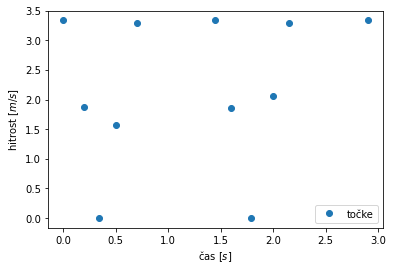

In [45]:
plt.plot(x, y, 'o', label='točke')
plt.xlabel('čas $[s]$')
plt.ylabel('hitrost $[m/s]$')
plt.grid
plt.legend();

In [46]:
a = 1.8
b = 10
c = 1.2
d = 1.8

In [47]:
def hitrost(x, a, b, c, d):
    '''
    Funkcija, ki opiše hitrost gibanja žogice v odvisnosti od časa
    '''
    return a*np.sin(b*x+c) + d

#približke a, b, c, d sem ugibala s pomočjo aplikacije, ki omogoča spreminjanje sinusne funkcije
#izbrala sem tiste parametre, ki moji funkciji najbolj ustrezajo

In [48]:
from scipy.optimize import curve_fit

In [49]:
popt, pcov = curve_fit(hitrost, x, y, p0=[1.8, 10, 1.2, 1.8])
popt

array([1.60016983, 8.78941981, 1.52882041, 1.76677099])

In [50]:
hitrost(x, *popt)

array([3.36553129, 1.53538167, 0.19697954, 1.2035891 , 3.34317376,
       3.35209743, 1.95208779, 0.16682906, 2.17521101, 3.36691463,
       3.2884047 ])

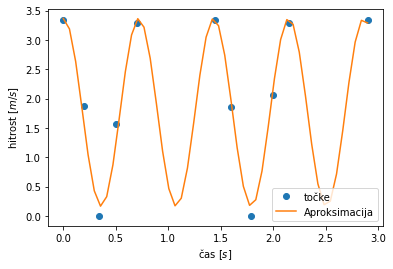

In [51]:
x_g = np.linspace(np.min(x), np.max(x), 50)
y_g = hitrost(x_g, *popt)

plt.plot(x, y, 'o', label='točke')
plt.plot(x_g, y_g, label='Aproksimacija')
plt.xlabel('čas $[s]$')
plt.ylabel('hitrost $[m/s]$')
plt.grid
plt.legend();

Kot je iz grafa razvidno, nam funkcija $y = 1.8*sin(10x + 1.2) + 1.8$ precej dobro ustreza spreminjanju hitrosti s časom, kar pomeni da smo aproksimacijo uspešno opravili.

Konsistentnost našega dobljenega grafa lahko pripišemo temu, da je žongliranje konec koncev le neskončno zaporedje meta navzgor in nato prostega pada. Sama sem si zadevo še malce zapletla, ker sem v izračunih in meritvah upoštevala še čas, ki ga žogica preživi v roki.

Z dosedaj dobljenimi rezultati sem zadovoljna, saj njihova dobršna točnost pomeni, da sem čase in poti merila dovolj natančno.

# Integriranje

Integriranja sem se lotila, ker sem opazila razliko med hitrostima žogice, ko le ta odleti iz roke in prileti nazaj v roko. To se mi zdi zanimiv primer, saj je pot na prvi pogled enaka, če gledaš osebo, kako žonglira, a sodeč po mojih izračunih in meritvah ni tako. 

Predvidevam, da se to dogaja zaradi človeške 'napake' pri ujemu in podaju žogice, saj ne moremo žogice podati in ujati zmeraj na točno isti višini. Popolnoma možno je, da bi pri drugi meritvi dobila drugačne rezultate.

Želela sem tudi opazovati napako, ki se neizbežno pojavlja pri aproksimaciji takšnega gibanja.

Na prikazanem grafu hitrosti v odvisnosti od časa je ploščina pod krivuljo enaka vredosti uporabljene integracijske metode - uporabila sem **sestavljeno trapezno pravilo**.

In [52]:
cas = np.array([0, 0.2, 0.34, 0.5, 0.7, 1.45, 1.6, 1.79, 2, 2.15, 2.9], dtype='float')

In [53]:
#prvotni interval časa sem omejila in razdelila na interval potovanja žogice navzgor in navzdol

cas_g, h_g = np.linspace(0, 0.34, 9, retstep=True) #korak h_g=0.0425, 9 vozlišč
cas_d, h_d = np.linspace(0.34, 0.7, 9, retstep=True) #korak h_d=0.0449999999, 9 vozlišč

#manjši korak, večja natančnost, saj imamo več podintervalov

In [54]:
hitrost_g = a*np.sin(b*cas_g + c) + d
hitrost_d = a*np.sin(b*cas_d + c) + d
#prej definirano funkcijo hitrosti prilagodim za cas_g (gor), cas_d (dol)
#parametre a, b, c, d imamo že definirane

In [55]:
pot_žogice_gor = np.trapz (hitrost_g, x=cas_g)
pot_žogice_gor

In [56]:
def pot_žogice_navzgor():
    '''
    Površina pod aproksimacijsko krivuljo je enaka vrednosti integrala sestavljenega trapeznega pravila.
    '''
    plt.fill_between(cas_g, hitrost_g, alpha=0.5, facecolor='lightpink')
    plt.vlines(cas_g, 0, hitrost_g, color='r', linestyles='dashed', lw=1) #vertikalne črte
    plt.annotate('$pot$ $navzgor$', (0.08, 0.26), fontsize = 15)
    plt.plot (x_g, y_g, lw = 3, alpha = 0.5, label = 'Harmonska aproksimacija') #graf iz aproksimacije
    #lw je širina črte, alpha pa da se vidi čez
    plt.plot (cas_g, hitrost_g, 'o', alpha=0.5, label=f'$h={h_g}$')
    plt.xlabel('čas $[s]$')
    plt.ylabel('hitrost $[m/s]$')
    plt.xlim(0, 0.6) #graf sem malo raztegnila, da se bolje vidijo napake
    plt.legend()

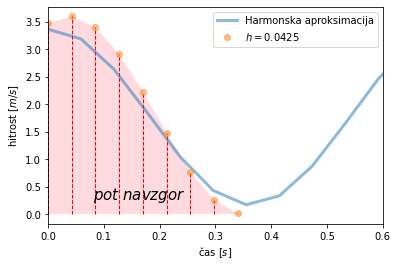

In [57]:
pot_žogice_navzgor()

In [58]:
pot_žogice_dol = np.trapz (hitrost_d, x=cas_d)
pot_žogice_dol

In [59]:
def pot_žogice_navzdol():
    '''
    Površina pod aproksimacijsko krivuljo je enaka vrednosti integrala sestavljenega trapeznega pravila.
    '''
    plt.fill_between(cas_d, hitrost_d, alpha=0.5, facecolor='lightskyblue')
    plt.vlines(cas_d, 0, hitrost_d, color='r', linestyles='dashed', lw=1)
    plt.annotate('$pot$ $navzdol$', (0.5, 0.6), fontsize = 15)
    plt.plot (x_g, y_g, lw = 3, alpha = 0.5, label = 'Harmonska aproksimacija')
    #lw je širina črte, alpha pa da se vidi čez
    plt.plot (cas_d, hitrost_d, 'o', alpha=0.5, label=f'$h={h_d}$')
    plt.xlabel('čas $[s]$')
    plt.ylabel('hitrost $[m/s]$')
    plt.xlim(0.3, 1) #graf sem malo raztegnila, da se bolje vidijo napake
    plt.legend(loc=(1.01, 0))

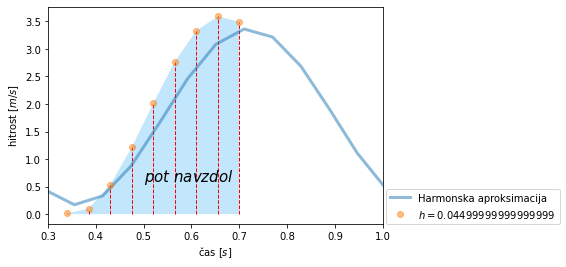

In [60]:
pot_žogice_navzdol()

In [61]:
def obe_poti_hkrati():
    '''
    Prikaz obeh poti hkrati, da lažje opazimo razliko
    '''
    plt.fill_between(cas_g, hitrost_g, alpha=0.5, facecolor='lightpink')
    plt.vlines(cas_g, 0, hitrost_g, color='r', linestyles='dashed', lw=0.5)
    plt.annotate('$pot$ $navzgor$', (0.06, 0.26), fontsize = 15)
    plt.plot (x_g, y_g, lw = 3, alpha = 0.5, label = 'Harmonska aproksimacija navzgor')
    plt.plot (cas_g, hitrost_g, 'o', alpha=0.5, label=f'$h_g={h_g}$')
    
    plt.fill_between(cas_d, hitrost_d, alpha=0.5, facecolor='lightskyblue')
    plt.vlines(cas_d, 0, hitrost_d, color='r', linestyles='dashed', lw=0.5)
    plt.annotate('$pot$ $navzdol$', (0.5, 0.6), fontsize = 15)
    plt.plot (x_g, y_g, lw = 3, alpha = 0.5, label = 'Harmonska aproksimacija navzdol')
    plt.plot (cas_d, hitrost_d, 'o', alpha=0.5, label=f'$h_d={h_d}$')
    
    plt.xlabel('čas $[s]$')
    plt.ylabel('hitrost $[m/s]$')
    plt.xlim(0, 0.8)
    plt.legend(loc=(1.01, 0))

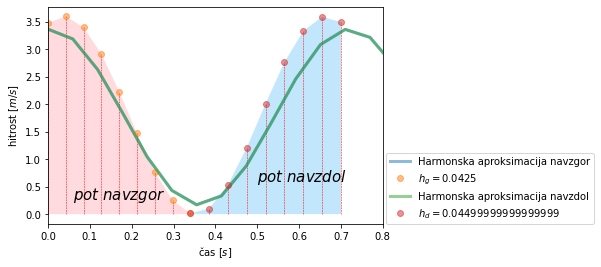

In [62]:
obe_poti_hkrati()

Kot vidimo razlika med potjo navzgor in navzdol obstaja, a je tako majhna da jo s prostim očesom težo zaznamo. Če pogledamo točki ki se gibljeta v okolici 0.3 in 0.4, vidimo, da je točka na strani poti navzdol nekoliko nižje.

Napake metode so na grafu vidne v obliki "žepkov" odstopanja med aproksimacijsko krivuljo in točkami, ki predstavljajo rezultat uporabljenega sestavljenega trapeznega pravila.

Nato bom še računsko prikazala razliko med potjo navzgor in navzdol:

In [63]:
razlika_poti_pri_os_meritvah = s_g - s_d
razlika_poti_pri_trap = pot_žogice_gor - pot_žogice_dol

print(f'\033[1m Rezultati sodeč po meritvah')
print(f'\033[0mPot navzgor: {s_g}m \nPot navzdol: {s_d}m \nRazlika poti: {razlika_poti_pri_os_meritvah}m\n')

print(f'\033[1m Rezultati sodeč po trapeznem pravilu')
print(f'\033[0mPot navzgor: {pot_žogice_gor}m \nPot navzdol: {pot_žogice_dol}m \nRazlika poti: {razlika_poti_pri_trap}m')

 Rezultati sodeč po meritvah
Pot navzgor: 0.567018m 
Pot navzdol: 0.55m 
Razlika poti: 0.017017999999999978m

 Rezultati sodeč po trapeznem pravilu
Pot navzgor: 0.6961223373696168m 
Pot navzdol: 0.6881685621333141m 
Razlika poti: 0.007953775236302696m


**Kako si lahko interpretiramo to, da so poti izračunane po trapeznem pravilu nekoliko večje od pravih izmerjenih?**

Dejstvo je, da je funkcija, ki opisuje hitrost, le aproksimacija, kar s seboj prinese določeno napako. Pot, izračunano po trapeznem pravilu, smo izpeljali iz te aproksimirane funkcije, ki je sicer dober približek, a ima precejšno napako. Za boljše rezultate bi morala funkcijo še natančnejše aproksimirati.

# Iskanje ničel

Pri iskanju ničel sem si zadala nalogo, da poiščem, pri katerem času hitrost doseže polovico maksimalne pri potovanju žogice navzgor.

V ta namen sem našo aproksimacijsko enačbo, ki opisuje hitrost simbolično preoblikovala tako, da krivulja ni premaknjena gor, temveč poteka na sredini vrednost hitrosti čez x-os. To sem dosegla tako, da sem odštela zadnji faktor, ki sinusno krivuljo premika gor/dol.

Z navpičnimi črtkanimi čtami sem označila interval, na katerem bomo iskali ničlo. 

In [64]:
def sredinska_hitrost(x):
    return 1.8*np.sin(10*x+1.2)

Text(0, 0.5, 'hitrost $[m/s]$')

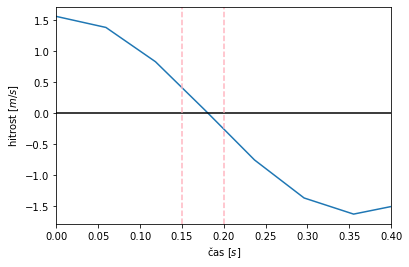

In [65]:
plt.plot (x_g, y_g-1.8, '-')
plt.axhline (y=0, color='black', linestyle='-')
plt.axvline (x=0.15, color='lightpink', linestyle='--')
plt.axvline (x=0.20, color='lightpink', linestyle='--')
plt.xlim (0, 0.4)
plt.xlabel('čas $[s]$')
plt.ylabel('hitrost $[m/s]$')

Ničlo bom preverila najprej z bisekcijsko, nato pa še s sekantno metodo.

In [66]:
from scipy.optimize import bisect
from scipy.optimize import newton

In [67]:
bi_čas = bisect(sredinska_hitrost, 0.15, 0.20)
bi_čas

In [68]:
sek_čas = newton (sredinska_hitrost, x0=0.15)
sek_čas

Preverim še, koliko časa traja, da posamezno metodo izpeljemo. Ugotovimo, da je bisekcijska metoda nekoliko hitrejša.

In [69]:
%timeit bisect(sredinska_hitrost,  0.15 , 0.20, xtol=1e-3)

9.56 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [70]:
%timeit newton(sredinska_hitrost, x0=0.15, tol=1.e-8)

195 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Rezultat še preverim:

In [71]:
bi_sredinska_hitrost = 1.8*np.sin(10*bi_čas + 1.2) + 1.8
sek_sredinska_hitrost = 1.8*np.sin(10*sek_čas + 1.2) + 1.8

bi_sredinska_hitrost, sek_sredinska_hitrost

To primerjamo z enačbo, ki smo jo v točki 4. uporabili za potovanje žogice navzgor.

In [72]:
v_bi = np.sqrt(v_0**2 - 2*g*v_0*bi_čas + g**2*bi_čas**2)
v_sek = np.sqrt(v_0**2 - 2*g*v_0*sek_čas + g**2*sek_čas**2)
v_bi, v_sek

Vidimo, da obstaja napaka, ki jo lahko pripišemo temu, da smo funkcijo aproksimirali.

# Reševanje diferencialnih enačb

Za namen reševanja diferencialnih enačb sem si nalogo v zvezi z žongliranjem izmislila, za faktor realističnosti sem pa lastne žonglerske žogice (prikazane na sliki na začetku) tudi stehtala. Vsaka tehta **68g** - teža je pri resnih žonglerskih žogicah precej pomembna zadeva, saj lahko z njeno pomočjo lažje reguliraš višino in naklon meta, poleg tega se v primerjavi z ostalimi žogicami zaradi teksture in polnila veliko manj kotalijo.


**Naloga:** Kot učenki žongliranja so mi žogice precej pogosto padale na tla. Nekega dne mi je žogica padla iz rok, na nogo. Nato sem žogico brcnila v zrak in žogica je **0.94s** letela **3m** v dolžino. Žogica tehta **0.068kg** in ima zračni upor **0.02** (je precej majhna). Žogico sem brcnila pod kotom $\alpha$.

Ker ne poznam vseh podatkov na začetku, temveč jih poznam nekaj na začetku in nekaj na koncu poti, vem, da se ukvarjam z robnim problemom.

Zapišemo podatke:

In [74]:
m = 0.068 #g
T = 0.94 #s
d = 3.2 #m, domet
c = 0.02 #N/(ms)^2, zračni upor
g = 9.81 #m/s^2

**Definiramo:**

velikost sile upora zraka: $F=cv^2$

hitrost: $v = \sqrt{\dot x^2 + \dot y^2}$

kot brce: $\alpha = 0.5arctan(\dot y/ \dot x)$

Ter nato še gibalni enačbi: $$\ddot x(t)=-F*cos(\alpha)/m$$ $$\ddot y(t)=-F*(sin(\alpha)/m)-g.$$


Sistem diferencialnih enačb drugega reda moramo preoblikovati v sistem enačb prvega reda tako, da odvajamo po neodvisni spremeljivki - čas.

$$y_0 = x \quad y_1 = \dot x \quad y_2 = y \quad y_3 = \dot y$$

Dobimo: $$y_0'= \dot x = y_1$$ $$y_1' = \ddot x = -F/m*cos(\alpha)$$ $$y_2' = \dot y = y_3$$ $$y_3' = \ddot y = -F/m*sin(\alpha) - g$$

Nato zapišemo funkcijo prvih odvodov: $$y = [y_0, y_1, y_2, y_3]$$ $$f(t, y) = [y_1, F/m*cos(\alpha), y_3, -F/m*sin(\alpha) - g]$$

Nato se lotimo numeričnega reševanja.

Funkcijo prvih odvodov zapišem še numerično:

In [75]:
def funkc_prvih_odv(t, y):
    """
   Funkcija prvih odvodov, s katero rešujemo nalogo poševne brce
   """
    alpha = 0.5*np.arctan2(y[3], y[1])
    v = np.sqrt(y[3]**2 + y[1]**2)
    F = c*v**(3/2)
    return y[1], -F*np.cos(alpha)/m, y[3], -F*np.sin(alpha)/m-g

Razmislek o robnih pogojih: spomnimo se neznank - pomik, hitrost v x smeri ter pomik, hitrost v y smeri, ter kakšne bi lahko bile vrednosti neznank ob času 0 in ob času t. 

Vemo, da sta pomika v x in y smeri ob času 0 enaka nič, saj je žogica še v "koordinatnem izhodišču" - na nogi. Prav tako vemo, da je pomik v y smeri ob času t enak 0, saj se žogica vrne v začetno višino. Vemo tudi, da je pomik v x smeri enak dometu d. To so naši **robni pogoji.**

Če robne pogoje zapišemo lepše: $$x(A) = 0$$ $$y(A) = 0$$ $$x(B) = d$$ $$y(B) = 0$$

Rob A je ob času 0, rob B pa ob času t.

**Ostale so nam še hitrosti - začetnih hitrosti v x in y smeri ne poznamo.**

Definiram robne preostanke (koliko nam manjka, da zadostimo robnim pogojem):

In [76]:
def robni_preostanki(y_A, y_B): #neznanke ob času 0 (rob A) in ob času t (rob B)
    '''
    Funkcija robnih preostankov, ki vrača vrednosti 0, ko so robni pogoji izpolnjeni.
    
    -parameter y_A: neznanke na robu A (t=0)
    -parameter y_B: neznanke na robu B (t=t)
    '''
    return np.array([y_A[0], y_A[2], y_B[0]-d, y_B[2]])

#y_A[0] je 1. neznanka na robu A - pomik v x smeri, ki more biti enaka 0, prav tako y_A[2] - pomik v y smeri na robu A
#y_B[0] - d more biti enako 0, da je y_B[0] = d (naš 3. robni pogoj)
#na robu B je tudi 2. neznanka - pomik v y smeri y_B[2] enak 0, da so naši robni pogoji izpolnjeni

Definiramo še vrednosti naše neodvisne spremenljivke - časa:

In [77]:
t = np.linspace (0, T, 100) #100 točk od časa 0 do t

Ter vrednosti začetnih ugibanj za naše neznanke:

In [78]:
y0 = np.zeros((4, len(t)))

#vrednosti y0 morajo biti enake oblike kot naše rešitve
#4 vrstice ker imamo 4 neznanke
#toliko stolpcev kolikor imamo časov

Nato imamo vse potrebne koščke sestavljanke, da se lotimo glavne funkcije solve_bvp:

In [79]:
from scipy.integrate import solve_bvp

In [80]:
rešitev = solve_bvp(funkc_prvih_odv, robni_preostanki, t, y0)

Zdaj se postavlja vprašanje, kje so shranjene naše neznane vrednosti?

In [81]:
x, vx, y, vy = rešitev.y #rešitev je objekt, ki ima atribut y - naše neznane vrednosti

**Rešitve so:**

x...pomik v x smeri

vx...hitrost v x smeri

y...pomik v y smeri

vy...hitrost v y smeri

Za ponazoritev primera narišem še graf:

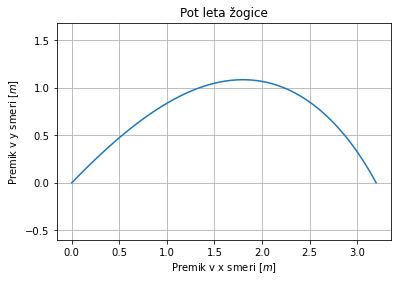

In [82]:
plt.plot(x, y)
plt.ylabel('Premik v y smeri $[m]$')
plt.xlabel('Premik v x smeri $[m]$')
plt.title('Pot leta žogice')

plt.axis('equal')
plt.grid()
plt.show()

Če ob pogledu na graf razmišljam o poti žogice, ki sem jo brcnila z nogo, se mi zdi le-ta ustrezna.